Tenemos:
- Etiqueta/label/Y: Setosa/Versicolor/Virginica (Variable dependiente, variable objetivo).
- Columnas/X/features: Largo y ancho del pétalo, largo y ancho del sépalo (4)

Dicho esto, no podemos ver las 4 dimensiones en simultaneo. Necesitamos un modelo 2D (como una hoja) o 3D (cubo).

De todos los angulos posibles desde donde puedo mirar el grupo de flores, PCA me elige el que mejor muestra como se separan.

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
plt.style.use('dark_background')

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [5]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Aplicamos PCA:

In [7]:
pca_scaled = PCA()

In [8]:
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

In [9]:
X_pca_scaled

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

Guardamos la varianza explicada y la varianza explicada acumulada en dos variables distintas para poderlas graficar.

In [10]:
explanied_variance_scaled = pca_scaled.explained_variance_ratio_
cumulative_variance_scaled = np.cumsum(explanied_variance_scaled)

In [11]:
# cálculo
explained_variance_scaled = pca_scaled.explained_variance_ratio_
cumulative_variance_scaled = np.cumsum(explained_variance_scaled)

# mostrar
explained_variance_scaled, cumulative_variance_scaled

(array([0.72962445, 0.22850762, 0.03668922, 0.00517871]),
 array([0.72962445, 0.95813207, 0.99482129, 1.        ]))

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
explained_variance_scaled, cumulative_variance_scaled

(array([0.72962445, 0.22850762, 0.03668922, 0.00517871]),
 array([0.72962445, 0.95813207, 0.99482129, 1.        ]))

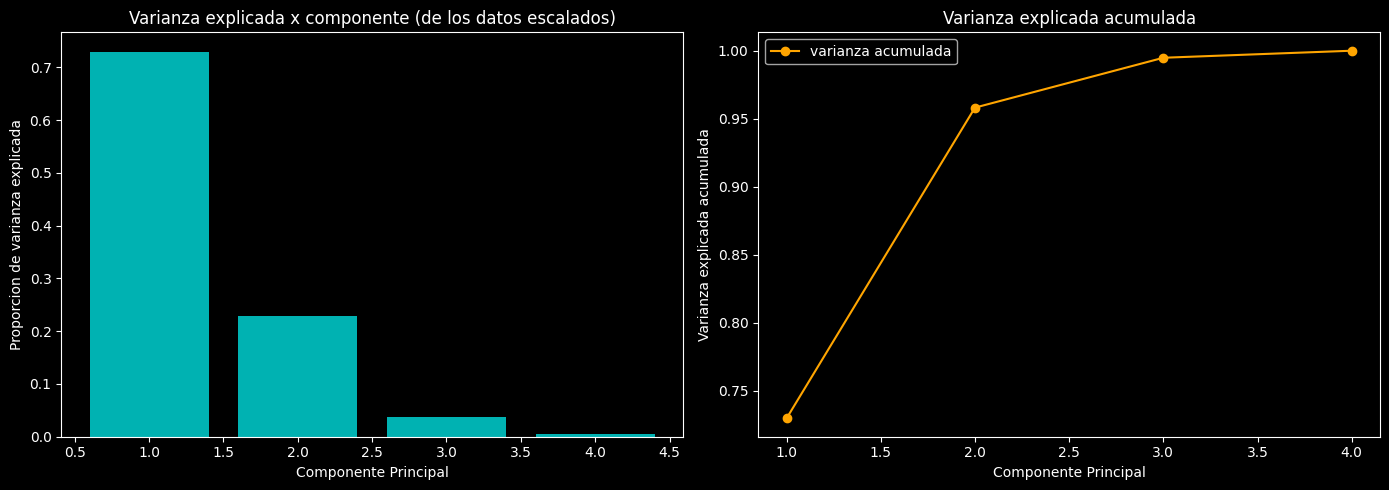

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
ax[0].bar(range(1, len(explanied_variance_scaled) + 1), explanied_variance_scaled, alpha = 0.7, color = 'cyan', label = "varianza explicada")
ax[0].set_xlabel('Componente Principal')
ax[0].set_ylabel('Proporcion de varianza explicada')
ax[0].set_title('Varianza explicada x componente (de los datos escalados)')

ax[1].plot(range(1, len(cumulative_variance_scaled) + 1), cumulative_variance_scaled, marker = 'o', linestyle='-', color = 'orange', label = "varianza acumulada")
ax[1].set_xlabel('Componente Principal')
ax[1].set_ylabel('Varianza explicada acumulada')
ax[1].set_title('Varianza explicada acumulada')
ax[1].legend()

plt.tight_layout()
plt.show()

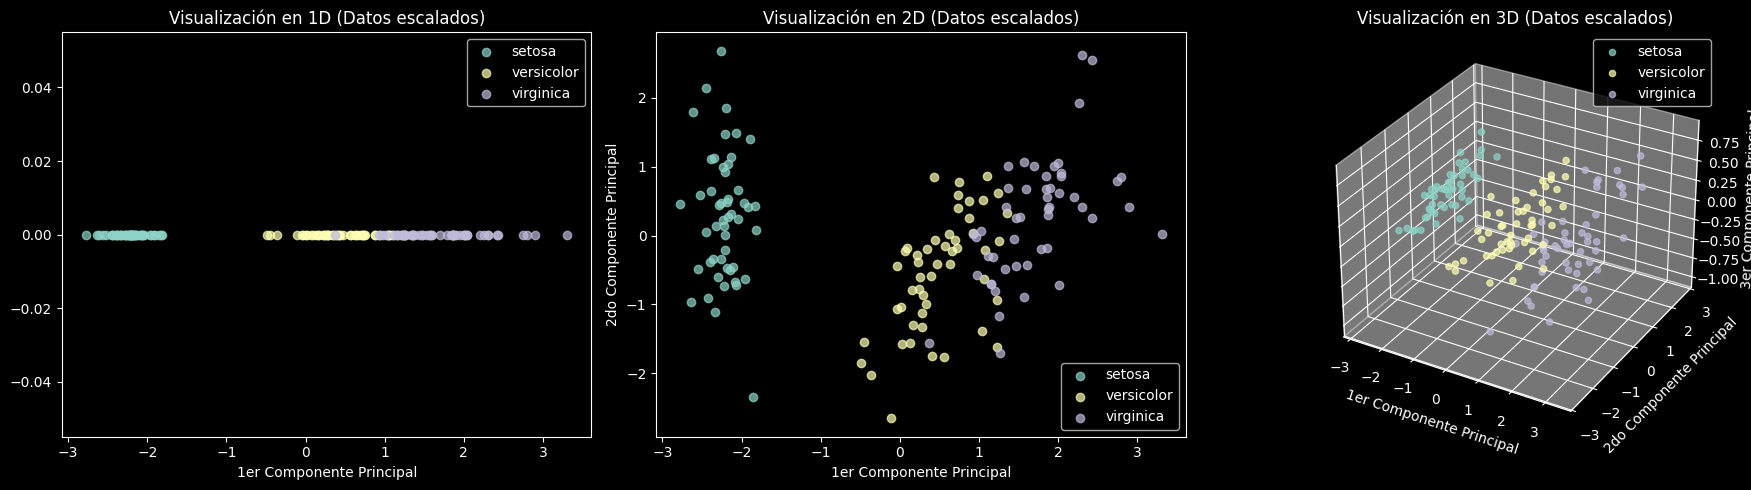

In [15]:
fig = plt.figure(figsize=(18, 5))

# Visualización en 1D
ax1 = fig.add_subplot(1, 3, 1)
for i, target_name in zip([0, 1, 2], target_names):
    ax1.scatter(X_pca_scaled[y == i, 0], [0] * sum(y == i), alpha=0.7, label=target_name)
ax1.set_xlabel('1er Componente Principal')
ax1.set_title('Visualización en 1D (Datos escalados)')
ax1.legend()

# Visualización en 2D
ax2 = fig.add_subplot(1, 3, 2)
for i, target_name in zip([0, 1, 2], target_names):
    ax2.scatter(X_pca_scaled[y == i, 0], X_pca_scaled[y == i, 1], alpha=0.7, label=target_name)
ax2.set_xlabel('1er Componente Principal')
ax2.set_ylabel('2do Componente Principal')
ax2.set_title('Visualización en 2D (Datos escalados)')
ax2.legend()

# Visualización en 3D
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
for i, target_name in zip([0, 1, 2], target_names):
    ax3.scatter(X_pca_scaled[y == i, 0], X_pca_scaled[y == i, 1], X_pca_scaled[y == i, 2], alpha=0.7, label=target_name)
ax3.set_xlabel('1er Componente Principal')
ax3.set_ylabel('2do Componente Principal')
ax3.set_zlabel('3er Componente Principal')
ax3.set_title('Visualización en 3D (Datos escalados)')
ax3.legend()

plt.tight_layout()
plt.show()